In [5]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from myprml.rv import VariationalGaussianMixture
from myprml.myfeatures import PolynomialFeatures

from myprml.linear import (
    VariationalLinearRegressor,
    VariationalLogisticRegressor
)
np.random.seed(1234)


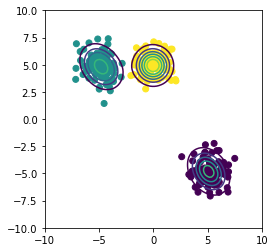

In [6]:

x1=np.random.normal(size=(100,2))
x1+=np.array([-5,5])
x2=np.random.normal(size=(100,2))
x2+=np.array([5,-5])
x3=np.random.normal(size=(100,2))
x3+=np.array([0,5])

x_train=np.vstack((x1,x2,x3))

x0,x1=np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
x=np.array([x0,x1]).reshape(2,-1).T

vgmm=VariationalGaussianMixture(n_components=6)
vgmm.fit(x_train)

plt.scatter(x_train[:,0],x_train[:,1],c=vgmm.classify(x_train))
plt.contour(x0,x1,vgmm.pdf(x).reshape(100,100))
plt.xlim(-10,10,100)
plt.ylim(-10,10,100)
plt.gca().set_aspect('equal',adjustable='box')
plt.show()


In [11]:
vgmm=VariationalGaussianMixture(n_components=6)
vgmm._init_params(x_train)
params=np.hstack([param.flatten() for param in vgmm.get_params()])
fig=plt.figure()
colors=np.array(["r","orange","y","g","b","purple"])
frames=[]

for _ in range(100):
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.gca().set_aspect('equal',adjustable='box')
    r=vgmm._variational_expection(x_train)
    imgs=[plt.scatter(x_train[:,0],x_train[:,1],c=colors[np.argmax(r,-1)])]
    for i in range(vgmm.n_components):
        if vgmm.component_size[i]>1:
            imgs.append(plt.scatter(vgmm.mu[i,0],vgmm.mu[i,1],100,colors[i],"X",lw=2,edgecolors="white"))
    frames.append(imgs)
    vgmm._variational_maximization(x_train,r)
    new_params=np.hstack([param.flatten() for param in vgmm.get_params()])
    if np.allclose(new_params,params):
        break
    else:
        params=np.copy(new_params)
plt.close()
plt.rcParams['animation.html']='html5'
anim=animation.ArtistAnimation(fig,frames)
anim

KeyError: 'ffmpeg'

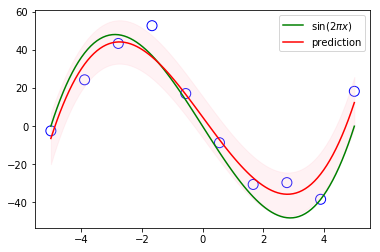

In [9]:


def create_toy_data(func,sample_size,std,domain=[0,1]):
    x=np.linspace(domain[0],domain[1],sample_size)
    np.random.shuffle(x)
    t=func(x)+np.random.normal(scale=std,size=x.shape)
    return x,t

def cubic(x):
    return x*(x-5)*(x+5)

x_train,y_train=create_toy_data(cubic,10,10,[-5,5])
x=np.linspace(-5,5,100)
y=cubic(x)

feature=PolynomialFeatures(degree=3)
X_train=feature.transform(x_train)
X=feature.transform(x)


vlr=VariationalLinearRegressor(beta=0.01)
vlr.fit(X_train,y_train)
y_mean,y_std=vlr.predict(X,return_std=True)
plt.scatter(x_train,y_train,s=100,facecolor="none",edgecolors="b")
plt.plot(x, y, c="g", label="$\sin(2\pi x)$")
plt.plot(x, y_mean, c="r", label="prediction")
plt.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.2, color="pink")
plt.legend()
plt.show()


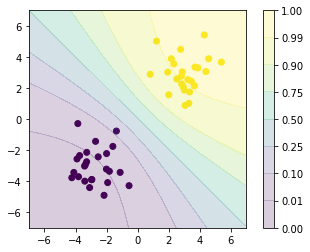

In [10]:

def create_toy_data(add_outliers=False,add_class=False):
    x0=np.random.normal(size=50).reshape(-1,2)-3
    x1=np.random.normal(size=50).reshape(-1,2)+3
    return np.concatenate([x0,x1]),np.concatenate([np.zeros(25),np.ones(25)]).astype(np.int)

x_train,y_train=create_toy_data()
x0,x1=np.meshgrid(np.linspace(-7,7,100),np.linspace(-7,7,100))
x=np.array([x0,x1]).reshape(2,-1).T
feature=PolynomialFeatures(degree=1)
X_train=feature.transform(x_train)
X=feature.transform(x)

vlr=VariationalLogisticRegressor()
vlr.fit(X_train,y_train)
y=vlr.proba(X).reshape(100,100)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.contourf(x0,x1,y,np.array([0.,0.01,0.1,0.25,0.5,0.75,0.9,0.99,1.]),alpha=0.2)
plt.colorbar()
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.gca().set_aspect('equal',adjustable='box')
plt.show()
